# Risk Stratification

## Problem Statement
A care management organisation called WeCare wants to identify among its diabetic patients, the ones that are at high risk of getting re-admitted to the hospital. They wish to intervene by providing some incentive to these patients that will help them improve their health. As the star analyst of this organisation, your job is to identify high-risk diabetic patients through risk stratification. This will help the payer to decide what are the right intervention programs for these patients.

## Loading, inspecting and cleaning data

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_orig= pd.read_csv("F:\\data science\\Assignment - Payer Analytics\\diabetic_data.csv")

In [3]:
df_orig

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [5]:
# To familiarize all the values
for column in df_orig:
    print(df_orig[column].unique())
    print('----------------------------------------------------------------------------------------')

[  2278392    149190     64410 ... 443854148 443857166 443867222]
----------------------------------------------------------------------------------------
[  8222157  55629189  86047875 ... 140199494 120975314 175429310]
----------------------------------------------------------------------------------------
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
----------------------------------------------------------------------------------------
['Female' 'Male' 'Unknown/Invalid']
----------------------------------------------------------------------------------------
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
----------------------------------------------------------------------------------------
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
----------------------------------------------------------------------------------------
[6 1 2 3 4 5 8 7]
------------

In [6]:
# Replacing all the '?' and 'Unknown/Invalid' with nan value since there isn't any value for them
df = df_orig.replace('?',np.nan)
df = df.replace('Unknown/Invalid',np.nan)

In [8]:
# To familiarize all the values
for column in df:
    print(df[column].unique())
    print('----------------------------------------------------------------------------------------')

[  2278392    149190     64410 ... 443854148 443857166 443867222]
----------------------------------------------------------------------------------------
[  8222157  55629189  86047875 ... 140199494 120975314 175429310]
----------------------------------------------------------------------------------------
['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
----------------------------------------------------------------------------------------
['Female' 'Male' nan]
----------------------------------------------------------------------------------------
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
----------------------------------------------------------------------------------------
[nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
----------------------------------------------------------------------------------------
[6 1 2 3 4 5 8 7]
--------------------------

['No' 'Up' 'Steady' 'Down']
----------------------------------------------------------------------------------------
['No' 'Steady' 'Down' 'Up']
----------------------------------------------------------------------------------------
['No' 'Steady']
----------------------------------------------------------------------------------------
['No' 'Steady']
----------------------------------------------------------------------------------------
['No' 'Steady']
----------------------------------------------------------------------------------------
['No' 'Steady']
----------------------------------------------------------------------------------------
['No' 'Ch']
----------------------------------------------------------------------------------------
['No' 'Yes']
----------------------------------------------------------------------------------------
['NO' '>30' '<30']
----------------------------------------------------------------------------------------


In [9]:
# Checking if there are columns with 101766 unique value since it won't affect our analysis
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             5
gender                           2
age                             10
weight                           9
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      17
medical_specialty               72
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         716
diag_2                         748
diag_3                         789
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [10]:
# Since encounter_id is different for everyone it means there are no duplicate rows
df = df.drop(['encounter_id'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 49 columns):
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101763 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non-null int64
diag_1                      101745 non

In [11]:
# Checking the percent of null values
(df.isnull().sum()/df.shape[0])*100

patient_nbr                  0.000000
race                         2.233555
gender                       0.002948
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropami

In [12]:
# Removing columns with null values more than 40%
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [13]:
# Percent of null values
(df.isnull().sum()/df.shape[0])*100

patient_nbr                 0.000000
race                        2.233555
gender                      0.002948
age                         0.000000
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.020636
diag_2                      0.351787
diag_3                      1.398306
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
chlorpropamide              0.000000
glimepiride                 0.000000
acetohexamide               0.000000
glipizide                   0.000000
g

In [14]:
# Removing null values in the rows
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 46 columns):
patient_nbr                 98052 non-null int64
race                        98052 non-null object
gender                      98052 non-null object
age                         98052 non-null object
admission_type_id           98052 non-null int64
discharge_disposition_id    98052 non-null int64
admission_source_id         98052 non-null int64
time_in_hospital            98052 non-null int64
num_lab_procedures          98052 non-null int64
num_procedures              98052 non-null int64
num_medications             98052 non-null int64
number_outpatient           98052 non-null int64
number_emergency            98052 non-null int64
number_inpatient            98052 non-null int64
diag_1                      98052 non-null object
diag_2                      98052 non-null object
diag_3                      98052 non-null object
number_diagnoses            98052 non-null int64
ma

In [15]:
# Percent of null values
(df.isnull().sum()/df.shape[0])*100

patient_nbr                 0.0
race                        0.0
gender                      0.0
age                         0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglitazone                0.0
rosiglitazone               0.0
acarbose

In [16]:
# Percent of data left after cleaning
round(100*(df.shape[0])/(df_orig.shape[0]),2)

96.35

There is around 96% of data left after removing the null values

## EDA

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 46 columns):
patient_nbr                 98052 non-null int64
race                        98052 non-null object
gender                      98052 non-null object
age                         98052 non-null object
admission_type_id           98052 non-null int64
discharge_disposition_id    98052 non-null int64
admission_source_id         98052 non-null int64
time_in_hospital            98052 non-null int64
num_lab_procedures          98052 non-null int64
num_procedures              98052 non-null int64
num_medications             98052 non-null int64
number_outpatient           98052 non-null int64
number_emergency            98052 non-null int64
number_inpatient            98052 non-null int64
diag_1                      98052 non-null object
diag_2                      98052 non-null object
diag_3                      98052 non-null object
number_diagnoses            98052 non-null int64
ma

All the values with object type are categorical values and others are numeric values. Splitting them to do an easy EDA

In [18]:
categorical = df.select_dtypes(include=['object'])
numeric = df.select_dtypes(exclude=['object'])

In [19]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 34 columns):
race                        98052 non-null object
gender                      98052 non-null object
age                         98052 non-null object
diag_1                      98052 non-null object
diag_2                      98052 non-null object
diag_3                      98052 non-null object
max_glu_serum               98052 non-null object
A1Cresult                   98052 non-null object
metformin                   98052 non-null object
repaglinide                 98052 non-null object
nateglinide                 98052 non-null object
chlorpropamide              98052 non-null object
glimepiride                 98052 non-null object
acetohexamide               98052 non-null object
glipizide                   98052 non-null object
glyburide                   98052 non-null object
tolbutamide                 98052 non-null object
pioglitazone                98052 non-nu

In [20]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98052 entries, 1 to 101765
Data columns (total 12 columns):
patient_nbr                 98052 non-null int64
admission_type_id           98052 non-null int64
discharge_disposition_id    98052 non-null int64
admission_source_id         98052 non-null int64
time_in_hospital            98052 non-null int64
num_lab_procedures          98052 non-null int64
num_procedures              98052 non-null int64
num_medications             98052 non-null int64
number_outpatient           98052 non-null int64
number_emergency            98052 non-null int64
number_inpatient            98052 non-null int64
number_diagnoses            98052 non-null int64
dtypes: int64(12)
memory usage: 9.7 MB


In [21]:
numeric.describe()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,9.805200e+04,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000
mean,5.484745e+07,2.025803,3.753396,5.776741,4.422011,43.148462,1.350712,16.119590,0.376382,0.202464,0.646871,7.512096
std,3.866167e+07,1.450121,5.309412,4.071632,2.993070,19.711757,1.708475,8.108496,1.283365,0.942897,1.271025,1.832472
min,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,2.350234e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,6.000000
50%,4.687610e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,8.800306e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


No outliers in numeric values

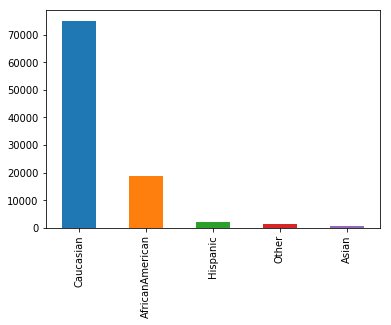

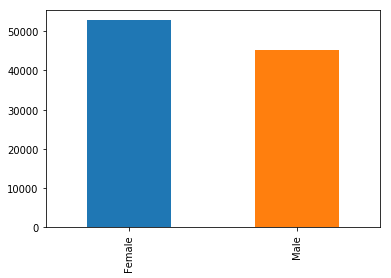

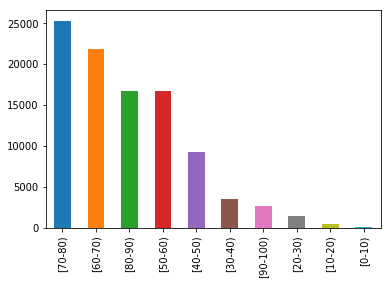

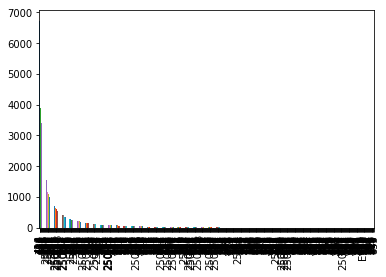

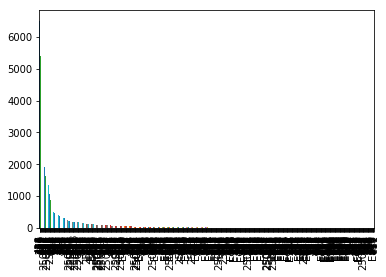

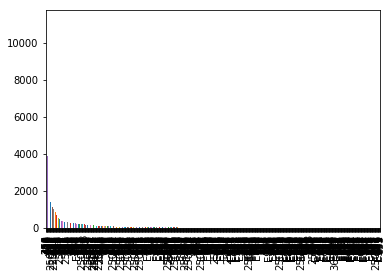

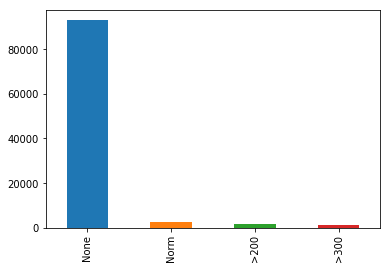

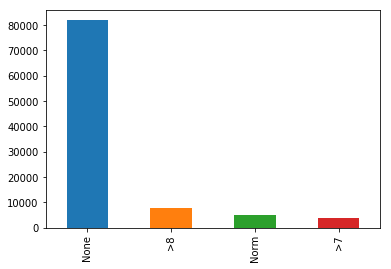

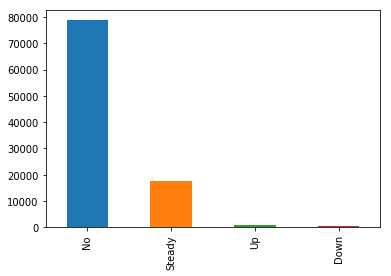

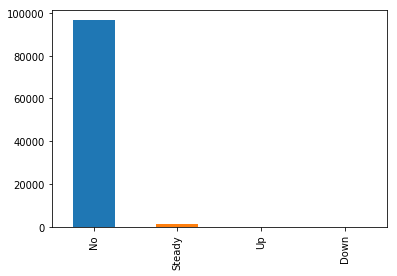

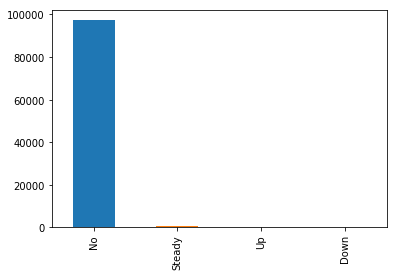

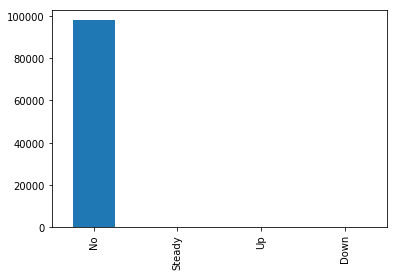

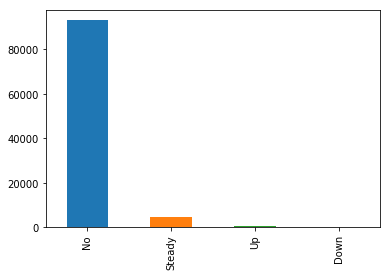

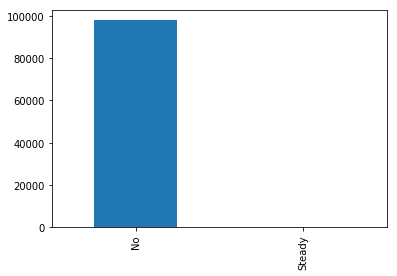

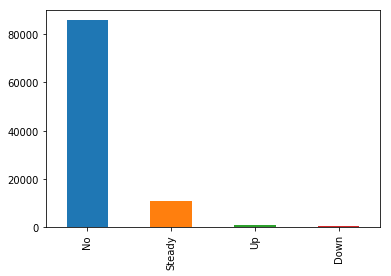

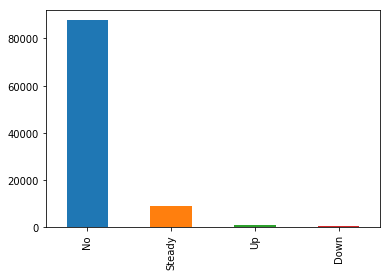

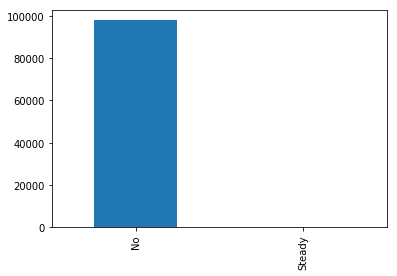

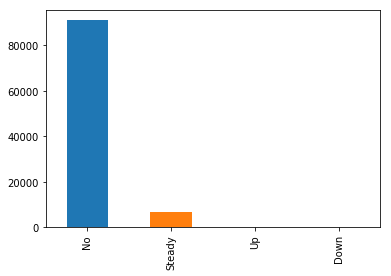

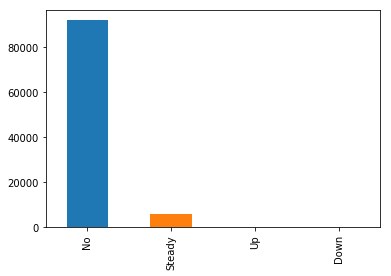

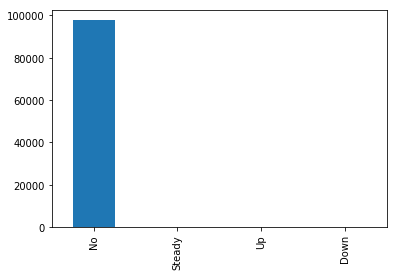

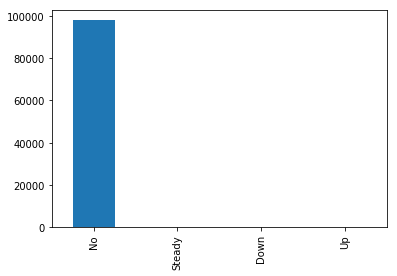

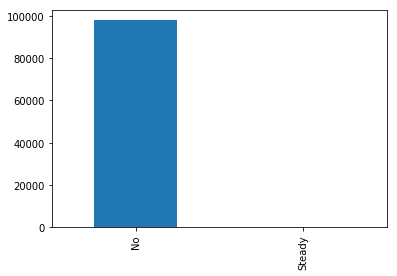

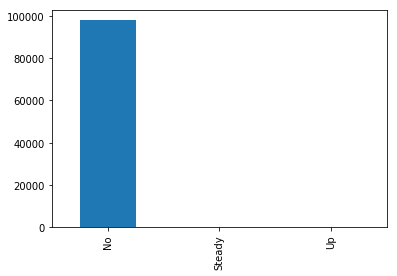

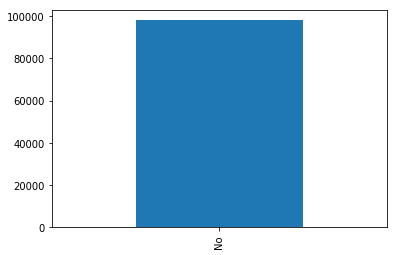

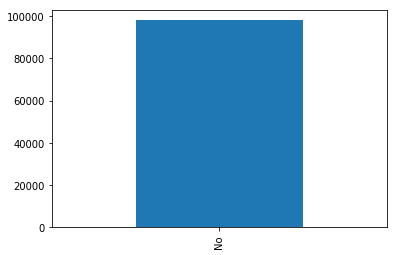

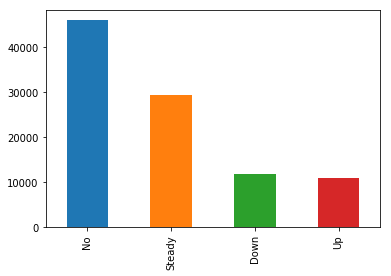

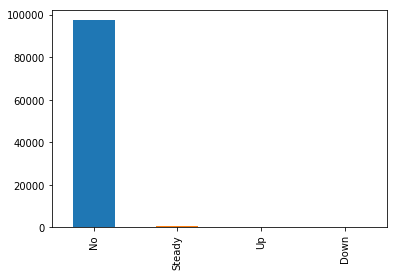

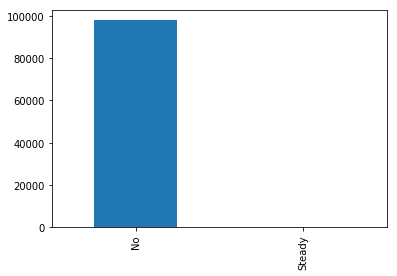

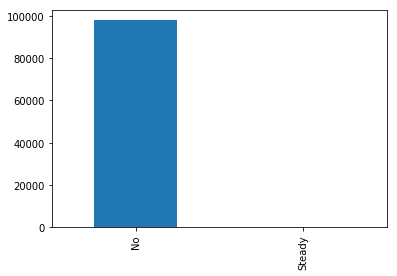

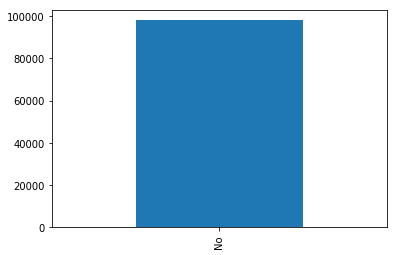

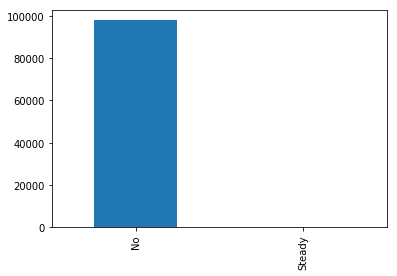

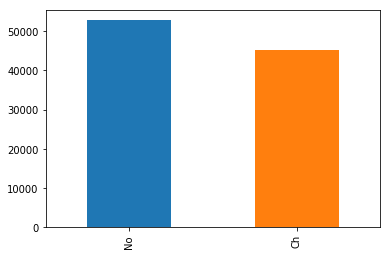

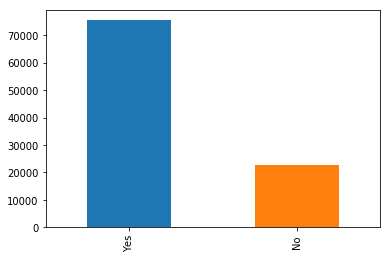

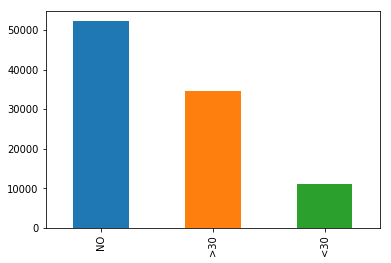

In [22]:
for col in categorical:
    categorical[col].value_counts().plot(kind='bar')
    plt.show()

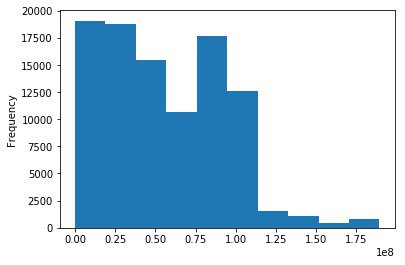

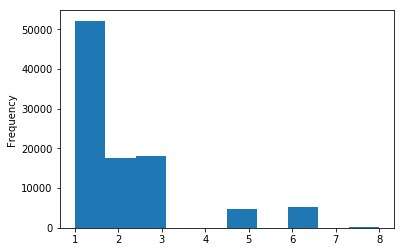

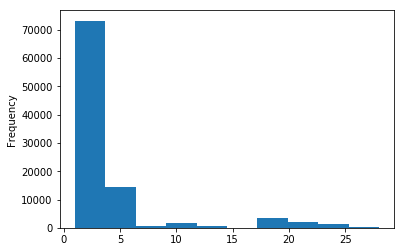

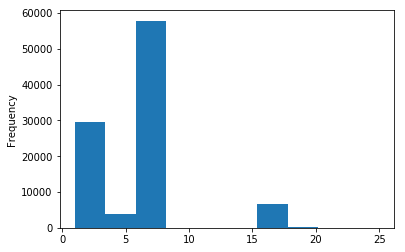

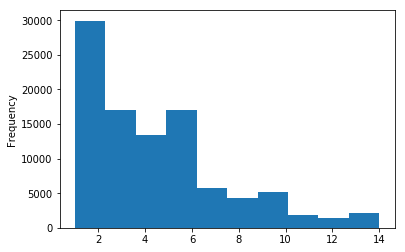

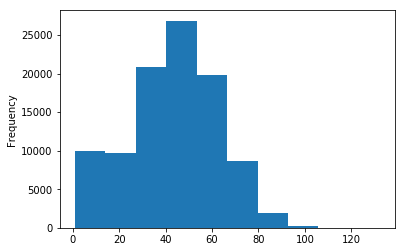

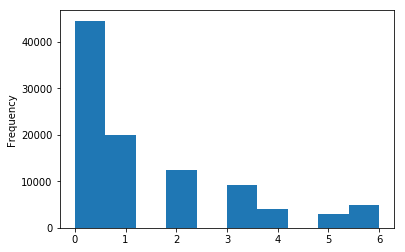

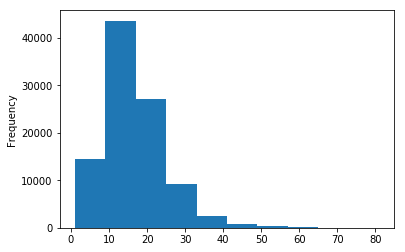

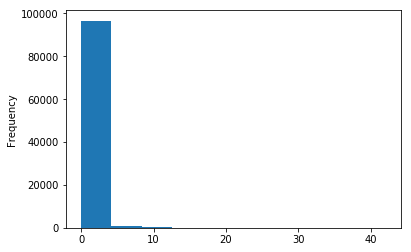

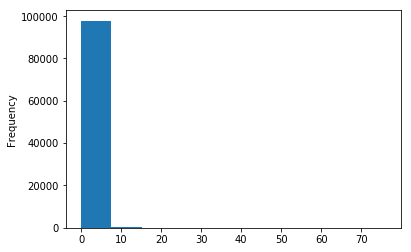

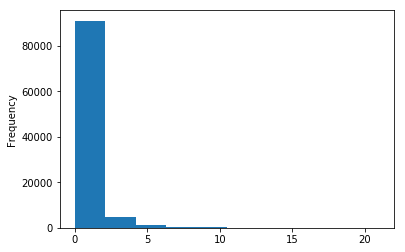

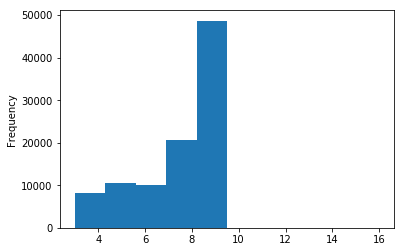

In [23]:
for col in numeric:
    numeric[col].plot.hist()
    plt.show()

## Deriving metrics

1. 'Readmitted'

In [24]:
# Looking for unique values in 'readmitted'
df['readmitted'].unique()

array(['>30', 'NO', '<30'], dtype=object)

In [25]:
# Converting it to yes or no (1 or 0)
df['readmitted'] = df['readmitted'].apply(lambda x : 0 if x == 'NO' else 1)
df['readmitted'].unique()

array([1, 0], dtype=int64)

2. Comorbidity

In [27]:
# Columns created to find who all are diagnosed diabetes meds
df['dia_1'] = pd.Series([1 if val.startswith('250') else 0 for val in df['diag_1']], index= df.index)
df['dia_2'] = pd.Series([1 if val.startswith('250') else 0 for val in df['diag_2']], index= df.index)
df['dia_3'] = pd.Series([1 if val.startswith('250') else 0 for val in df['diag_3']], index= df.index)

In [28]:
# Fuction for circulatory diseases
def f(s):
    if 'V' in str(s) or 'E' in str(s):
        return 0
    
    x = float(s)
    
    if x >= 390 and x <= 459:
        return 1
    else:
        return 0

In [29]:
# Creating 3 variables for circulatory diseases
df['cir_1'] = df['diag_1'].apply(lambda x : f(x))
df['cir_2'] = df['diag_2'].apply(lambda x : f(x))
df['cir_3'] = df['diag_3'].apply(lambda x : f(x))

In [30]:
# Two variables to complie if the person has diabeties or circulatory disease 
df['dia'] = np.where((df['dia_1'] | df['dia_2'] | df['dia_3']) == 1,1,0)
df['cir'] = np.where((df['cir_1'] | df['cir_2'] | df['cir_3']) == 1,1,0)

In [31]:
# Fuction to create comorbidity
def c(x,y):
    if  (x == 0) & (y == 0):
        return 0
    elif (x == 1) & (y == 0):
        return 1
    elif (x == 0) & (y == 1):
        return 2
    else:
        return 3

In [32]:
# Comorbidity
df['comorbidity'] = df.apply(lambda x : c(x.dia , x.cir), axis = 1)

In [33]:
# Dropping all columns other than comorbidity
df_new = df.drop(['dia_1','dia_2','dia_3','cir_1','cir_2','cir_3','dia','cir','diag_1','diag_2','diag_3'], axis = 1)

3. 'patient_nbr'

In [35]:
# How many patient duplicates are there, means how many  got readmitted
patients = df_new['patient_nbr']
df_new[patients.isin(patients[patients.duplicated()])].shape

(45703, 44)

In [36]:
df_new.shape

(98052, 44)

In [37]:
# Keeping only the first ones in them 
df_new = df_new.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
df_new.shape

(68629, 44)

In [38]:
# Converting the following terms since they are categorical values
df_new['admission_type_id'] = df_new['admission_type_id'].astype('object')
df_new['admission_source_id'] = df_new['admission_source_id'].astype('object')
df_new['discharge_disposition_id'] = df_new['discharge_disposition_id'].astype('object')
df_new['comorbidity'] = df_new['comorbidity'].astype('object')
df_new['max_glu_serum'] = df_new['max_glu_serum'].astype('object')
df_new['A1Cresult'] = df_new['A1Cresult'].astype('object')

4. 'change'

In [40]:
df_new['change'].unique()

array(['Ch', 'No'], dtype=object)

In [41]:
df_new['change'] = df_new['change'].apply(lambda x : 0 if x == 'No' else 1)
df_new['change'].unique()

array([1, 0], dtype=int64)

5. All medication

In [42]:
# Dropping all medicines 
df_new = df_new.drop(['citoglipton','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'], axis =1)

6. 'total_visits'

In [44]:
# Combining all the visits to the hospital
df_new['total_visits'] = df_new['number_outpatient'] + df_new['number_emergency'] + df_new['number_inpatient']

In [45]:
# Dropping unwanted columns
df_new = df_new.drop(['number_outpatient','number_emergency','number_inpatient'], axis = 1)

7. 'examide'

In [47]:
# Inspecting unique values in each row
for column in df_new:
    print(df_new[column].unique())
    print('----------------------------------------------------------------------------------------')

[ 55629189  86047875  82442376 ... 140199494 120975314 175429310]
----------------------------------------------------------------------------------------
['Caucasian' 'AfricanAmerican' 'Other' 'Asian' 'Hispanic']
----------------------------------------------------------------------------------------
['Female' 'Male']
----------------------------------------------------------------------------------------
['[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)' '[70-80)'
 '[80-90)' '[90-100)' '[0-10)']
----------------------------------------------------------------------------------------
[1 2 3 6 4 5 8 7]
----------------------------------------------------------------------------------------
[1 3 6 2 5 11 7 25 10 14 4 18 8 12 13 17 16 22 23 9 15 20 28 24 19 27]
----------------------------------------------------------------------------------------
[7 2 4 1 5 6 20 3 17 8 9 14 10 22 11 25 13]
---------------------------------------------------------------------------------------

In [48]:
df_new['examide'].unique()

array(['No'], dtype=object)

In [49]:
# Dropping unwanted columns
df_new = df_new.drop(['examide'], axis = 1)

8. 'A1Cresult'

In [50]:
df_new['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

In [51]:
df_new['A1Cresult'] = df_new['A1Cresult'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )
df_new['A1Cresult'].unique()

array([0, 2, 1], dtype=int64)

9. 'max_glu_serum'

In [52]:
df_new['max_glu_serum'].unique()

array(['None', '>300', 'Norm', '>200'], dtype=object)

In [53]:
df_new['max_glu_serum'] = df_new['max_glu_serum'].apply(lambda x: 0 if x == "None" else (1 if x=="Norm" else 2) )
df_new['max_glu_serum'].unique()

array([0, 2, 1], dtype=int64)

10. 'diabetesMed'

In [54]:
df_new['diabetesMed'].unique()

array(['Yes', 'No'], dtype=object)

In [55]:
df_new['diabetesMed'] = df_new['diabetesMed'].apply(lambda x : 0 if x == 'No' else 1)
df_new['diabetesMed'].unique()

array([1, 0], dtype=int64)

In [56]:
df_new.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidity,total_visits
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,9,0,0,1,1,1,1,0
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,6,0,0,0,1,0,1,3
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,7,0,0,1,1,0,3,0
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,5,0,0,1,1,0,1,0
5,82637451,Caucasian,Male,[50-60),2,1,2,3,31,6,16,9,0,0,0,1,1,3,0


In [57]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68629 entries, 1 to 101765
Data columns (total 19 columns):
patient_nbr                 68629 non-null int64
race                        68629 non-null object
gender                      68629 non-null object
age                         68629 non-null object
admission_type_id           68629 non-null object
discharge_disposition_id    68629 non-null object
admission_source_id         68629 non-null object
time_in_hospital            68629 non-null int64
num_lab_procedures          68629 non-null int64
num_procedures              68629 non-null int64
num_medications             68629 non-null int64
number_diagnoses            68629 non-null int64
max_glu_serum               68629 non-null int64
A1Cresult                   68629 non-null int64
change                      68629 non-null int64
diabetesMed                 68629 non-null int64
readmitted                  68629 non-null int64
comorbidity                 68629 non-null object
t

In [58]:
# Changing the type of variables
df_new['max_glu_serum'] = df_new['max_glu_serum'].astype('object')
df_new['A1Cresult'] = df_new['A1Cresult'].astype('object')
df_new['change'] = df_new['change'].astype('object')
df_new['diabetesMed'] = df_new['diabetesMed'].astype('object')
df_new['readmitted'] = df_new['readmitted'].astype('object')

In [59]:
# Final cleaned data 
df = df_new
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68629 entries, 1 to 101765
Data columns (total 19 columns):
patient_nbr                 68629 non-null int64
race                        68629 non-null object
gender                      68629 non-null object
age                         68629 non-null object
admission_type_id           68629 non-null object
discharge_disposition_id    68629 non-null object
admission_source_id         68629 non-null object
time_in_hospital            68629 non-null int64
num_lab_procedures          68629 non-null int64
num_procedures              68629 non-null int64
num_medications             68629 non-null int64
number_diagnoses            68629 non-null int64
max_glu_serum               68629 non-null object
A1Cresult                   68629 non-null object
change                      68629 non-null object
diabetesMed                 68629 non-null object
readmitted                  68629 non-null object
comorbidity                 68629 non-null obj

## Preparing for model

In [60]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [217]:
# Seperating into categortical and numric
categorical = df.select_dtypes(include=['object'])
numeric = df.select_dtypes(exclude=['object'])
print(categorical.columns.values)
print(numeric.columns.values)

[]
['patient_nbr' 'time_in_hospital' 'num_lab_procedures' 'num_procedures'
 'num_medications' 'number_diagnoses' 'change' 'diabetesMed' 'readmitted'
 'total_visits' 'race_AfricanAmerican' 'race_Asian' 'race_Caucasian'
 'race_Hispanic' 'race_Other' 'gender_Female' 'gender_Male' 'age_[0-10)'
 'age_[10-20)' 'age_[20-30)' 'age_[30-40)' 'age_[40-50)' 'age_[50-60)'
 'age_[60-70)' 'age_[70-80)' 'age_[80-90)' 'age_[90-100)'
 'admission_type_id_1' 'admission_type_id_2' 'admission_type_id_3'
 'admission_type_id_4' 'admission_type_id_5' 'admission_type_id_6'
 'admission_type_id_7' 'admission_type_id_8' 'discharge_disposition_id_1'
 'discharge_disposition_id_2' 'discharge_disposition_id_3'
 'discharge_disposition_id_4' 'discharge_disposition_id_5'
 'discharge_disposition_id_6' 'discharge_disposition_id_7'
 'discharge_disposition_id_8' 'discharge_disposition_id_9'
 'discharge_disposition_id_10' 'discharge_disposition_id_11'
 'discharge_disposition_id_12' 'discharge_disposition_id_13'
 'discharge_di

In [62]:
# Creating dummies
category = ['race', 'gender' , 'age' ,'admission_type_id' ,'discharge_disposition_id','admission_source_id' ,'max_glu_serum' ,'A1Cresult' , 'comorbidity']
dummy = pd.get_dummies(df[category])
df = pd.concat([df, dummy], axis=1)
df = df.drop(category, axis=1)

In [63]:
# Converting everything into float for model building
df = df.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68629 entries, 1 to 101765
Data columns (total 88 columns):
patient_nbr                    68629 non-null float64
time_in_hospital               68629 non-null float64
num_lab_procedures             68629 non-null float64
num_procedures                 68629 non-null float64
num_medications                68629 non-null float64
number_diagnoses               68629 non-null float64
change                         68629 non-null float64
diabetesMed                    68629 non-null float64
readmitted                     68629 non-null float64
total_visits                   68629 non-null float64
race_AfricanAmerican           68629 non-null float64
race_Asian                     68629 non-null float64
race_Caucasian                 68629 non-null float64
race_Hispanic                  68629 non-null float64
race_Other                     68629 non-null float64
gender_Female                  68629 non-null float64
gender_Male               

## Logistic Regression

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# Putting feature variable to X
X = df.drop(['readmitted'], axis=1)
X.head()

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,total_visits,race_AfricanAmerican,...,max_glu_serum_0,max_glu_serum_1,max_glu_serum_2,A1Cresult_0,A1Cresult_1,A1Cresult_2,comorbidity_0,comorbidity_1,comorbidity_2,comorbidity_3
1,55629189.0,3.0,59.0,0.0,18.0,9.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,86047875.0,2.0,11.0,5.0,13.0,6.0,0.0,1.0,3.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,82442376.0,2.0,44.0,1.0,16.0,7.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,42519267.0,1.0,51.0,0.0,8.0,5.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,82637451.0,3.0,31.0,6.0,16.0,9.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
# Putting response variable to y
y = df['readmitted']
y.head()

1    1.0
2    0.0
3    0.0
4    0.0
5    1.0
Name: readmitted, dtype: float64

In [67]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
numeric = ['time_in_hospital', 'num_lab_procedures' ,'num_procedures','num_medications', 'number_diagnoses', 'total_visits']

In [70]:
scaler = StandardScaler()
X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_train.head()

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,total_visits,race_AfricanAmerican,...,max_glu_serum_0,max_glu_serum_1,max_glu_serum_2,A1Cresult_0,A1Cresult_1,A1Cresult_2,comorbidity_0,comorbidity_1,comorbidity_2,comorbidity_3
13197,7432065.0,0.232488,-0.104050,1.447332,0.028619,0.877914,0.0,1.0,-0.397303,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
97094,180326111.0,-0.105805,-0.756389,-0.253606,-0.092376,-1.244793,1.0,1.0,-0.397303,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
43461,88415883.0,-0.105805,-2.111245,0.313373,0.270610,-0.183439,0.0,1.0,2.364645,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
18772,86967.0,1.247367,-0.003690,-0.820586,0.149615,0.877914,0.0,1.0,0.293184,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
95249,66152043.0,-0.782390,-0.053870,0.313373,-0.818350,0.877914,0.0,0.0,-0.397303,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [71]:
# Checking the readmitted Rate
readmitted = (sum(df['readmitted'])/len(df['readmitted'].index))*100
readmitted

40.43480161447784

We have almost 40% readmitted rate

### Looking at Correlations

In [72]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

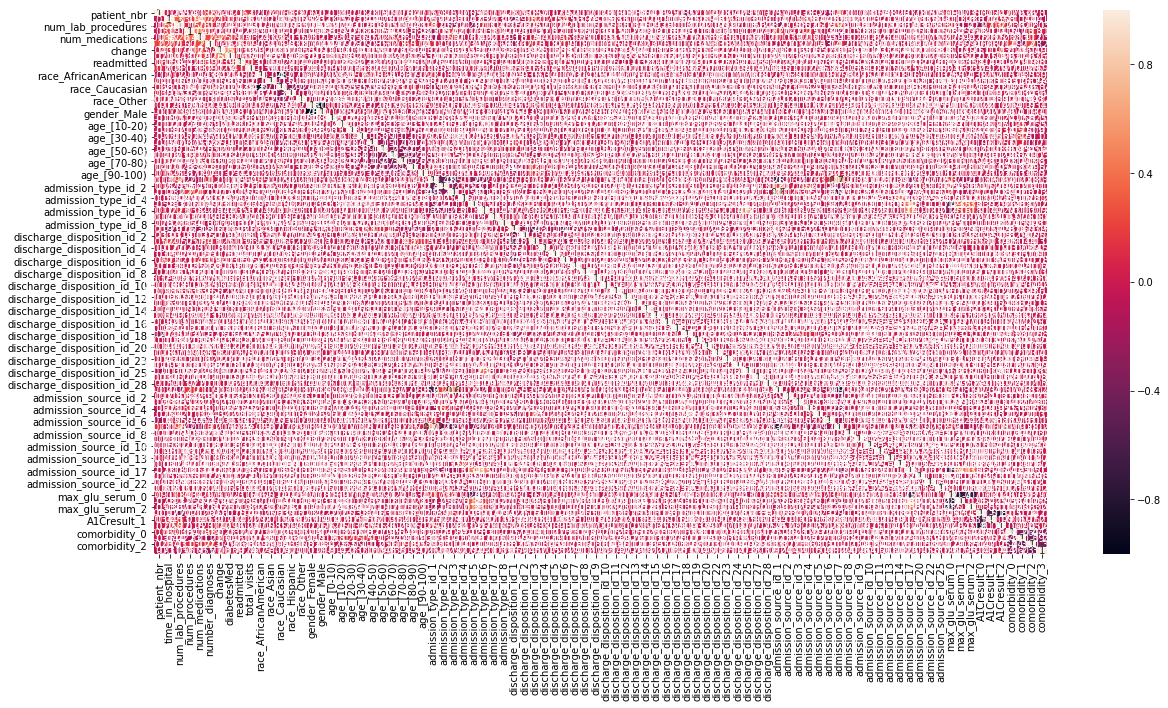

In [73]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

### Model Building

In [74]:
import statsmodels.api as sm

In [75]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train).astype(float)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                48040
Model:                            GLM   Df Residuals:                    47964
Model Family:                Binomial   Df Model:                           75
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 Nov 2019   Deviance:                          nan
Time:                        16:20:24   Pearson chi2:                 8.98e+19
No. Iterations:                   100   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        -2.92e+14   3.16e+06  -9.24e+07      0.000   -2.92e+14   -2.92e+14
patient_nbr                  1.115e+06      0.009   1.29e+08      0.000    1.12e+06    1.12e+06
time_in_hospital             7.729e+13   3.81e+05   2.03e+08      0.000    7.73e+13    7.73e+13
num_lab_procedures           5.282e+13   3.72e+05   1.42e+08      0.000    5.28e+13    5.28e+13
num_procedures               -4.08e+13   3.56e+05  -1.15e+08      0.000   -4.08e+13   -4.08e+13
num_medications             -5.871e+12   4.11e+05  -1.43e+07      0.000   -5.87e+12   -5.87e+12
number_diagnoses             9.194e+13   3.69e+05   2.49e+08      0.000    9.19e+13    9.19e+13
change                      -4.798e+12   7.38e+05   -6.5e+06      0.000    -4.8e+12    -4.8e+12
diabetesMed                  2.552e+14   8.38e+05   3.04e+08      0.000    2.55e+14    2.55e+14
total_visits                 4.143e+14   3.13e+05   1.32e+09      0.000    4.14e+14    4.14e+14
race_AfricanAmerican         3.497e+13   1.26e+06   2.77e+07      0.000     3.5e+13     3.5e+13
race_Asian                   7.054e+13   3.12e+06   2.26e+07      0.000    7.05e+13    7.05e+13
race_Caucasian                3.87e+13   1.15e+06   3.36e+07      0.000    3.87e+13    3.87e+13
race_Hispanic               -1.663e+14      2e+06  -8.32e+07      0.000   -1.66e+14   -1.66e+14
race_Other                  -2.699e+14   2.18e+06  -1.24e+08      0.000    -2.7e+14    -2.7e+14
gender_Female               -1.155e+14   1.61e+06  -7.18e+07      0.000   -1.15e+14   -1.15e+14
gender_Male                 -1.765e+14   1.61e+06   -1.1e+08      0.000   -1.77e+14   -1.77e+14
age_[0-10)                  -9.528e+13   8.55e+06  -1.11e+07      0.000   -9.53e+13   -9.53e+13
age_[10-20)                 -3.084e+14   3.96e+06  -7.79e+07      0.000   -3.08e+14   -3.08e+14
age_[20-30)                  1.365e+15   2.52e+06   5.43e+08      0.000    1.37e+15    1.37e+15
age_[30-40)                  1.723e+15   1.83e+06   9.43e+08      0.000    1.72e+15    1.72e+15
age_[40-50)                 -5.542e+14   1.44e+06  -3.86e+08      0.000   -5.54e+14   -5.54e+14
age_[50-60)                 -5.636e+14   1.31e+06   -4.3e+08      0.000   -5.64e+14   -5.64e+14
age_[60-70)                 -4.574e+14   1.28e+06  -3.56e+08      0.000   -4.57e+14   -4.57e+14
age_[70-80)                 -3.347e+14   1.28e+06  -2.62e+08      0.000   -3.35e+14   -3.35e+14
age_[80-90)                 -3.295e+14   1.36e+06  -2.42e+08      0.000   -3.29e+14   -3.29e+14
age_[90-100)                -7.375e+14   2.07e+06  -3.56e+08      0.000   -7.38e+14   -7.38e+14
admission_type_id_1         -7.294e+14   4.12e+06  -1.77e+08      0.000   -7.29e+14   -7.29e+14
admission_type_id_2         -5.619e+14   4.12e+06  -1.36e+08      0.000   -5.62e+14   -5.62e+14
admission_type_id_3         -7.143e+14   4.15e+06  -1.72e+08      0.000   -7.14e+14   -7.1

 ### Feature Selection Using RFE

In [76]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [77]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [78]:
rfe.support_

array([ True,  True, False, False, False,  True, False,  True,  True,
       False, False,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False])

In [79]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('patient_nbr', True, 1),
 ('time_in_hospital', True, 1),
 ('num_lab_procedures', False, 2),
 ('num_procedures', False, 12),
 ('num_medications', False, 10),
 ('number_diagnoses', True, 1),
 ('change', False, 3),
 ('diabetesMed', True, 1),
 ('total_visits', True, 1),
 ('race_AfricanAmerican', False, 8),
 ('race_Asian', False, 34),
 ('race_Caucasian', True, 1),
 ('race_Hispanic', False, 30),
 ('race_Other', False, 31),
 ('gender_Female', True, 1),
 ('gender_Male', True, 1),
 ('age_[0-10)', False, 49),
 ('age_[10-20)', False, 46),
 ('age_[20-30)', False, 29),
 ('age_[30-40)', False, 21),
 ('age_[40-50)', False, 14),
 ('age_[50-60)', False, 6),
 ('age_[60-70)', False, 9),
 ('age_[70-80)', False, 16),
 ('age_[80-90)', False, 22),
 ('age_[90-100)', False, 25),
 ('admission_type_id_1', True, 1),
 ('admission_type_id_2', False, 13),
 ('admission_type_id_3', True, 1),
 ('admission_type_id_4', False, 57),
 ('admission_type_id_5', False, 27),
 ('admission_type_id_6', False, 28),
 ('admission_ty

In [80]:
col = X_train.columns[rfe.support_]
col

Index(['patient_nbr', 'time_in_hospital', 'number_diagnoses', 'diabetesMed',
       'total_visits', 'race_Caucasian', 'gender_Female', 'gender_Male',
       'admission_type_id_1', 'admission_type_id_3',
       'discharge_disposition_id_1', 'admission_source_id_1',
       'admission_source_id_7', 'max_glu_serum_0', 'A1Cresult_0'],
      dtype='object')

In [81]:
X_train.columns[~rfe.support_]

Index(['num_lab_procedures', 'num_procedures', 'num_medications', 'change',
       'race_AfricanAmerican', 'race_Asian', 'race_Hispanic', 'race_Other',
       'age_[0-10)', 'age_[10-20)', 'age_[20-30)', 'age_[30-40)',
       'age_[40-50)', 'age_[50-60)', 'age_[60-70)', 'age_[70-80)',
       'age_[80-90)', 'age_[90-100)', 'admission_type_id_2',
       'admission_type_id_4', 'admission_type_id_5', 'admission_type_id_6',
       'admission_type_id_7', 'admission_type_id_8',
       'discharge_disposition_id_2', 'discharge_disposition_id_3',
       'discharge_disposition_id_4', 'discharge_disposition_id_5',
       'discharge_disposition_id_6', 'discharge_disposition_id_7',
       'discharge_disposition_id_8', 'discharge_disposition_id_9',
       'discharge_disposition_id_10', 'discharge_disposition_id_11',
       'discharge_disposition_id_12', 'discharge_disposition_id_13',
       'discharge_disposition_id_14', 'discharge_disposition_id_15',
       'discharge_disposition_id_16', 'discharge_d

### Assessing the model with StatsModels

In [82]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                48040
Model:                            GLM   Df Residuals:                    48025
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31506.
Date:                Mon, 11 Nov 2019   Deviance:                       63013.
Time:                        16:20:36   Pearson chi2:                 4.97e+04
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.5396      0.039    -13.955      0.000      -0.615      -0.464
patient_nbr                 1.301e-09   2.53e-10      5.136      0.000    8.05e-10     1.8e-09
time_in_hospital               0.0780      0.010      7.728      0.000       0.058       0.098
number_diagnoses               0.1231      0.010     11.954      0.000       0.103       0.143
diabetesMed                    0.2809      0.023     12.430      0.000       0.237       0.325
total_visits                   0.2891      0.011     25.171      0.000       0.267       0.312
race_Caucasian                 0.0796      0.023      3.455      0.001       0.034       0.125
gender_Female                 -0.2380      0.021    -11.208      0.000      -0.280      -0.196
gender_Male                   -0.3017      0.022    -13.785      0.000      -0.345      -0.259
admission_type_id_1           -0.2714      0.029     -9.317      0.000      -0.328      -0.214
admission_type_id_3           -0.2703      0.031     -8.675      0.000      -0.331      -0.209
discharge_disposition_id_1    -0.0171      0.021     -0.829      0.407      -0.058       0.023
admission_source_id_1          0.1716      0.035      4.964      0.000       0.104       0.239
admission_source_id_7          0.3983      0.034     11.722      0.000       0.332       0.465
max_glu_serum_0               -0.1016      0.048     -2.114      0.035      -0.196      -0.007
A1Cresult_0                    0.1182      0.025      4.673      0.000       0.069       0.168
==============================================================================================
"""

In [83]:
# Getting the predicted values on the train set
y_train_pred_final = res.predict(X_train_sm)
y_train_pred_final[:10]

13197    0.413534
97094    0.363980
43461    0.562519
18772    0.465598
95249    0.414431
8323     0.337276
39437    0.350325
64419    0.418691
26699    0.376625
63539    0.437152
dtype: float64

In [84]:
y_train_pred_final = y_train_pred_final.values.reshape(-1)
y_train_pred_final[:10]

array([0.41353359, 0.36397989, 0.56251932, 0.46559784, 0.41443138,
       0.33727595, 0.35032484, 0.4186909 , 0.37662471, 0.43715152])

In [85]:
y_train_pred_final = pd.DataFrame({'Readmitted':y_train.values, 'Readmitted_Prob':y_train_pred_final})
y_train_pred_final['patient_nbr'] = y_train.index
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patient_nbr
0,0.0,0.413534,13197
1,0.0,0.363980,97094
2,1.0,0.562519,43461
3,1.0,0.465598,18772
4,0.0,0.414431,95249


In [86]:
y_train_pred_final['predicted'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 0 if x <0.7 else 1)
y_train_pred_final['risk_statification'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 'low' if x <0.3 else ('medium' if (0.3<x<0.7) else 'high') )
# Let's see the head
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patient_nbr,predicted,risk_statification
0,0.0,0.413534,13197,0,medium
1,0.0,0.363980,97094,0,medium
2,1.0,0.562519,43461,0,medium
3,1.0,0.465598,18772,0,medium
4,0.0,0.414431,95249,0,medium


In [87]:
from sklearn import metrics

In [88]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Readmitted, y_train_pred_final.predicted )
print(confusion)

[[28446   165]
 [19046   383]]


In [89]:
# Predicted     not_Readmitted    Readmitted
# Actual
# not_Readmitted        28446       165
# Readmitted            19046       383 

In [90]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Readmitted, y_train_pred_final.predicted))

0.6001040799333889


Checking VIFs

In [91]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,gender_Female,20.24
7,gender_Male,18.22
12,admission_source_id_7,3.08
11,admission_source_id_1,2.76
8,admission_type_id_1,2.37
9,admission_type_id_3,1.68
13,max_glu_serum_0,1.21
1,time_in_hospital,1.15
2,number_diagnoses,1.15
10,discharge_disposition_id_1,1.13


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'gender_Female' has the highest VIF. So let's start by dropping that.

In [93]:
col = col.drop('gender_Female', 1)
col

Index(['patient_nbr', 'time_in_hospital', 'number_diagnoses', 'diabetesMed',
       'total_visits', 'race_Caucasian', 'gender_Male', 'admission_type_id_1',
       'admission_type_id_3', 'discharge_disposition_id_1',
       'admission_source_id_1', 'admission_source_id_7', 'max_glu_serum_0',
       'A1Cresult_0'],
      dtype='object')

In [94]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                48040
Model:                            GLM   Df Residuals:                    48025
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31506.
Date:                Mon, 11 Nov 2019   Deviance:                       63013.
Time:                        16:20:39   Pearson chi2:                 4.97e+04
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.7776      0.058    -13.309      0.000      -0.892      -0.663
patient_nbr                 1.301e-09   2.53e-10      5.136      0.000    8.05e-10     1.8e-09
time_in_hospital               0.0780      0.010      7.728      0.000       0.058       0.098
number_diagnoses               0.1231      0.010     11.954      0.000       0.103       0.143
diabetesMed                    0.2809      0.023     12.430      0.000       0.237       0.325
total_visits                   0.2891      0.011     25.171      0.000       0.267       0.312
race_Caucasian                 0.0796      0.023      3.455      0.001       0.034       0.125
gender_Male                   -0.0637      0.019     -3.337      0.001      -0.101      -0.026
admission_type_id_1           -0.2714      0.029     -9.317      0.000      -0.328      -0.214
admission_type_id_3           -0.2703      0.031     -8.675      0.000      -0.331      -0.209
discharge_disposition_id_1    -0.0171      0.021     -0.829      0.407      -0.058       0.023
admission_source_id_1          0.1716      0.035      4.964      0.000       0.104       0.239
admission_source_id_7          0.3983      0.034     11.722      0.000       0.332       0.465
max_glu_serum_0               -0.1016      0.048     -2.114      0.035      -0.196      -0.007
A1Cresult_0                    0.1182      0.025      4.673      0.000       0.069       0.168
==============================================================================================
"""

In [95]:
y_train_pred_final = res.predict(X_train_sm).values.reshape(-1)

In [96]:
y_train_pred_final[:10]

array([0.41353359, 0.36397989, 0.56251932, 0.46559784, 0.41443138,
       0.33727595, 0.35032484, 0.4186909 , 0.37662471, 0.43715152])

In [97]:
y_train_pred_final

array([0.41353359, 0.36397989, 0.56251932, ..., 0.48390766, 0.4734436 ,
       0.29649414])

In [98]:
y_train_pred_final = pd.DataFrame({'Readmitted':y_train.values, 'Readmitted_Prob':y_train_pred_final})
y_train_pred_final['patient_nbr'] = y_train.index
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patient_nbr
0,0.0,0.413534,13197
1,0.0,0.363980,97094
2,1.0,0.562519,43461
3,1.0,0.465598,18772
4,0.0,0.414431,95249


In [99]:
y_train_pred_final['predicted'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 0 if x <0.7 else 1)
y_train_pred_final['risk_statification'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 'low' if x <0.3 else ('medium' if (0.3<x<0.7) else 'high') )
# Let's see the head
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patient_nbr,predicted,risk_statification
0,0.0,0.413534,13197,0,medium
1,0.0,0.363980,97094,0,medium
2,1.0,0.562519,43461,0,medium
3,1.0,0.465598,18772,0,medium
4,0.0,0.414431,95249,0,medium


In [100]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Readmitted, y_train_pred_final.predicted))

0.6001040799333889


In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,max_glu_serum_0,15.51
11,admission_source_id_7,6.61
7,admission_type_id_1,4.85
13,A1Cresult_0,4.76
5,race_Caucasian,4.02
10,admission_source_id_1,3.94
3,diabetesMed,3.79
0,patient_nbr,3.27
9,discharge_disposition_id_1,2.86
8,admission_type_id_3,2.09


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'max_glu_serum_0' has the highest VIF. So let's start by dropping that.

In [102]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('max_glu_serum_0')
col

Index(['patient_nbr', 'time_in_hospital', 'number_diagnoses', 'diabetesMed',
       'total_visits', 'race_Caucasian', 'gender_Male', 'admission_type_id_1',
       'admission_type_id_3', 'discharge_disposition_id_1',
       'admission_source_id_1', 'admission_source_id_7', 'A1Cresult_0'],
      dtype='object')

In [103]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                48040
Model:                            GLM   Df Residuals:                    48026
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31509.
Date:                Mon, 11 Nov 2019   Deviance:                       63017.
Time:                        16:20:40   Pearson chi2:                 4.97e+04
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.8518      0.047    -18.203      0.000      -0.943      -0.760
patient_nbr                 1.269e-09   2.53e-10      5.018      0.000    7.73e-10    1.76e-09
time_in_hospital               0.0779      0.010      7.720      0.000       0.058       0.098
number_diagnoses               0.1215      0.010     11.832      0.000       0.101       0.142
diabetesMed                    0.2799      0.023     12.391      0.000       0.236       0.324
total_visits                   0.2907      0.011     25.334      0.000       0.268       0.313
race_Caucasian                 0.0809      0.023      3.516      0.000       0.036       0.126
gender_Male                   -0.0635      0.019     -3.330      0.001      -0.101      -0.026
admission_type_id_1           -0.2836      0.029     -9.931      0.000      -0.340      -0.228
admission_type_id_3           -0.2785      0.031     -9.013      0.000      -0.339      -0.218
discharge_disposition_id_1    -0.0201      0.021     -0.978      0.328      -0.060       0.020
admission_source_id_1          0.1510      0.033      4.560      0.000       0.086       0.216
admission_source_id_7          0.3852      0.033     11.539      0.000       0.320       0.451
A1Cresult_0                    0.1208      0.025      4.781      0.000       0.071       0.170
==============================================================================================
"""

In [104]:
y_train_pred_final = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final[:10]

array([0.41319173, 0.362654  , 0.56248865, 0.46644406, 0.41720119,
       0.33777305, 0.34937743, 0.41875255, 0.37928404, 0.43684321])

In [105]:
y_train_pred_final = pd.DataFrame({'Readmitted':y_train.values, 'Readmitted_Prob':y_train_pred_final})
y_train_pred_final['patient_nbr'] = y_train.index
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patient_nbr
0,0.0,0.413192,13197
1,0.0,0.362654,97094
2,1.0,0.562489,43461
3,1.0,0.466444,18772
4,0.0,0.417201,95249


In [106]:
y_train_pred_final['predicted'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 0 if x <0.7 else 1)
y_train_pred_final['risk_statification'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 'low' if x <0.3 else ('medium' if (0.3<x<0.7) else 'high') )
# Let's see the head
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patient_nbr,predicted,risk_statification
0,0.0,0.413192,13197,0,medium
1,0.0,0.362654,97094,0,medium
2,1.0,0.562489,43461,0,medium
3,1.0,0.466444,18772,0,medium
4,0.0,0.417201,95249,0,medium


In [107]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Readmitted, y_train_pred_final.predicted))

0.5999167360532889


In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,admission_source_id_7,5.93
7,admission_type_id_1,4.43
12,A1Cresult_0,4.35
5,race_Caucasian,3.81
3,diabetesMed,3.53
10,admission_source_id_1,3.19
0,patient_nbr,3.17
9,discharge_disposition_id_1,2.73
8,admission_type_id_3,2.05
6,gender_Male,1.85


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'admission_source_id_7' has the highest VIF. So let's start by dropping that.

In [109]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('admission_source_id_7')
col

Index(['patient_nbr', 'time_in_hospital', 'number_diagnoses', 'diabetesMed',
       'total_visits', 'race_Caucasian', 'gender_Male', 'admission_type_id_1',
       'admission_type_id_3', 'discharge_disposition_id_1',
       'admission_source_id_1', 'A1Cresult_0'],
      dtype='object')

In [110]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                48040
Model:                            GLM   Df Residuals:                    48027
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31576.
Date:                Mon, 11 Nov 2019   Deviance:                       63152.
Time:                        16:20:42   Pearson chi2:                 4.95e+04
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.6872      0.044    -15.481      0.000      -0.774      -0.600
patient_nbr                 1.813e-09   2.48e-10      7.309      0.000    1.33e-09     2.3e-09
time_in_hospital               0.0754      0.010      7.490      0.000       0.056       0.095
number_diagnoses               0.1243      0.010     12.123      0.000       0.104       0.144
diabetesMed                    0.2798      0.023     12.401      0.000       0.236       0.324
total_visits                   0.2864      0.011     25.067      0.000       0.264       0.309
race_Caucasian                 0.0738      0.023      3.212      0.001       0.029       0.119
gender_Male                   -0.0636      0.019     -3.340      0.001      -0.101      -0.026
admission_type_id_1           -0.1132      0.024     -4.649      0.000      -0.161      -0.066
admission_type_id_3           -0.2743      0.031     -8.892      0.000      -0.335      -0.214
discharge_disposition_id_1    -0.0102      0.021     -0.497      0.619      -0.050       0.030
admission_source_id_1         -0.0404      0.028     -1.420      0.155      -0.096       0.015
A1Cresult_0                    0.1024      0.025      4.066      0.000       0.053       0.152
==============================================================================================
"""

In [111]:
y_train_pred_final = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final[:10]

array([0.40081456, 0.37621176, 0.56233279, 0.459974  , 0.37086331,
       0.33221962, 0.3462977 , 0.41007997, 0.36678029, 0.43164028])

In [112]:
y_train_pred_final = pd.DataFrame({'Readmitted':y_train.values, 'Readmitted_Prob':y_train_pred_final})
y_train_pred_final['patient_nbr'] = y_train.index
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patient_nbr
0,0.0,0.400815,13197
1,0.0,0.376212,97094
2,1.0,0.562333,43461
3,1.0,0.459974,18772
4,0.0,0.370863,95249


In [113]:
y_train_pred_final['predicted'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 0 if x <0.7 else 1)
y_train_pred_final['risk_statification'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 'low' if x <0.3 else ('medium' if (0.3<x<0.7) else 'high') )
# Let's see the head
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patient_nbr,predicted,risk_statification
0,0.0,0.400815,13197,0,medium
1,0.0,0.376212,97094,0,medium
2,1.0,0.562333,43461,0,medium
3,1.0,0.459974,18772,0,medium
4,0.0,0.370863,95249,0,medium


In [114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Readmitted, y_train_pred_final.predicted))

0.6000416319733556


In [115]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,A1Cresult_0,4.30
5,race_Caucasian,3.77
3,diabetesMed,3.47
0,patient_nbr,2.94
7,admission_type_id_1,2.74
9,discharge_disposition_id_1,2.68
10,admission_source_id_1,2.60
8,admission_type_id_3,2.05
6,gender_Male,1.84
2,number_diagnoses,1.14


There are a few variables with high p value. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'discharge_disposition_id_1' has p value more than 0.05. So let's start by dropping that.

In [116]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('discharge_disposition_id_1')
col

Index(['patient_nbr', 'time_in_hospital', 'number_diagnoses', 'diabetesMed',
       'total_visits', 'race_Caucasian', 'gender_Male', 'admission_type_id_1',
       'admission_type_id_3', 'admission_source_id_1', 'A1Cresult_0'],
      dtype='object')

In [117]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                48040
Model:                            GLM   Df Residuals:                    48028
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31576.
Date:                Mon, 11 Nov 2019   Deviance:                       63153.
Time:                        16:20:43   Pearson chi2:                 4.95e+04
No. Iterations:                     4   Covariance Type:             nonrobust
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.6934      0.043    -16.293      0.000      -0.777      -0.610
patient_nbr            1.808e-09   2.48e-10      7.295      0.000    1.32e-09    2.29e-09
time_in_hospital          0.0768      0.010      7.915      0.000       0.058       0.096
number_diagnoses          0.1248      0.010     12.226      0.000       0.105       0.145
diabetesMed               0.2796      0.023     12.394      0.000       0.235       0.324
total_visits              0.2865      0.011     25.076      0.000       0.264       0.309
race_Caucasian            0.0745      0.023      3.247      0.001       0.030       0.119
gender_Male              -0.0642      0.019     -3.376      0.001      -0.101      -0.027
admission_type_id_1      -0.1135      0.024     -4.661      0.000      -0.161      -0.066
admission_type_id_3      -0.2743      0.031     -8.890      0.000      -0.335      -0.214
admission_source_id_1    -0.0410      0.028     -1.444      0.149      -0.097       0.015
A1Cresult_0               0.1029      0.025      4.092      0.000       0.054       0.152
=========================================================================================
"""

In [118]:
y_train_pred_final = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final[:10]

array([0.40194604, 0.37685437, 0.56330066, 0.46130184, 0.37170599,
       0.33252318, 0.34735164, 0.40847827, 0.36523463, 0.43231032])

In [119]:
y_train_pred_final = pd.DataFrame({'Readmitted':y_train.values, 'Readmitted_Prob':y_train_pred_final})
y_train_pred_final['patient_nbr'] = y_train.index
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patient_nbr
0,0.0,0.401946,13197
1,0.0,0.376854,97094
2,1.0,0.563301,43461
3,1.0,0.461302,18772
4,0.0,0.371706,95249


In [120]:
y_train_pred_final['predicted'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 0 if x <0.7 else 1)
y_train_pred_final['risk_statification'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 'low' if x <0.3 else ('medium' if (0.3<x<0.7) else 'high') )
# Let's see the head
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patient_nbr,predicted,risk_statification
0,0.0,0.401946,13197,0,medium
1,0.0,0.376854,97094,0,medium
2,1.0,0.563301,43461,0,medium
3,1.0,0.461302,18772,0,medium
4,0.0,0.371706,95249,0,medium


In [121]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Readmitted, y_train_pred_final.predicted))

0.6


In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,A1Cresult_0,4.23
5,race_Caucasian,3.75
3,diabetesMed,3.39
0,patient_nbr,2.89
7,admission_type_id_1,2.65
9,admission_source_id_1,2.56
8,admission_type_id_3,2.04
6,gender_Male,1.82
2,number_diagnoses,1.12
1,time_in_hospital,1.07


There are a few variables with high p value. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'admission_source_id_1' has p value more than 0.5. So let's start by dropping that.

In [123]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('admission_source_id_1')
col

Index(['patient_nbr', 'time_in_hospital', 'number_diagnoses', 'diabetesMed',
       'total_visits', 'race_Caucasian', 'gender_Male', 'admission_type_id_1',
       'admission_type_id_3', 'A1Cresult_0'],
      dtype='object')

In [124]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             readmitted   No. Observations:                48040
Model:                            GLM   Df Residuals:                    48029
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31577.
Date:                Mon, 11 Nov 2019   Deviance:                       63155.
Time:                        16:20:44   Pearson chi2:                 4.95e+04
No. Iterations:                     4   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.7108      0.041    -17.404      0.000      -0.791      -0.631
patient_nbr          1.811e-09   2.48e-10      7.308      0.000    1.33e-09     2.3e-09
time_in_hospital        0.0773      0.010      7.974      0.000       0.058       0.096
number_diagnoses        0.1250      0.010     12.245      0.000       0.105       0.145
diabetesMed             0.2797      0.023     12.399      0.000       0.235       0.324
total_visits            0.2863      0.011     25.059      0.000       0.264       0.309
race_Caucasian          0.0747      0.023      3.257      0.001       0.030       0.120
gender_Male            -0.0640      0.019     -3.366      0.001      -0.101      -0.027
admission_type_id_1    -0.0983      0.022     -4.474      0.000      -0.141      -0.055
admission_type_id_3    -0.2930      0.028    -10.478      0.000      -0.348      -0.238
A1Cresult_0             0.1032      0.025      4.101      0.000       0.054       0.152
=======================================================================================
"""

In [125]:
y_train_pred_final = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final[:10]

array([0.40159789, 0.37822213, 0.56458557, 0.46751838, 0.36783161,
       0.33208127, 0.34868224, 0.40807628, 0.37083119, 0.43190942])

In [126]:
y_train_pred_final = pd.DataFrame({'Readmitted':y_train.values, 'Readmitted_Prob':y_train_pred_final})
y_train_pred_final['patient_nbr'] = y_train.index
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patient_nbr
0,0.0,0.401598,13197
1,0.0,0.378222,97094
2,1.0,0.564586,43461
3,1.0,0.467518,18772
4,0.0,0.367832,95249


In [127]:
y_train_pred_final['predicted'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 0 if x <0.7 else 1)
y_train_pred_final['risk_statification'] = y_train_pred_final.Readmitted_Prob.map(lambda x: 'low' if x <0.3 else ('medium' if (0.3<x<0.7) else 'high') )
# Let's see the head
y_train_pred_final.head()

,Readmitted,Readmitted_Prob,patient_nbr,predicted,risk_statification
0,0.0,0.401598,13197,0,medium
1,0.0,0.378222,97094,0,medium
2,1.0,0.564586,43461,0,medium
3,1.0,0.467518,18772,0,medium
4,0.0,0.367832,95249,0,medium


In [128]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,A1Cresult_0,4.10
5,race_Caucasian,3.69
3,diabetesMed,3.32
0,patient_nbr,2.86
7,admission_type_id_1,2.32
6,gender_Male,1.82
8,admission_type_id_3,1.59
2,number_diagnoses,1.11
1,time_in_hospital,1.07
4,total_visits,1.02


In [129]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Readmitted, y_train_pred_final.predicted )
confusion

array([[28453,   158],
       [19061,   368]], dtype=int64)

In [130]:
# Predicted     not_Readmitted    Readmitted
# Actual
# not_Readmitted        28446       165
# Readmitted            19046       383 

In [131]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Readmitted, y_train_pred_final.predicted))

0.5999375520399667


### Metrics beyond simply accuracy

In [132]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [133]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.018940758659735445

In [134]:
# Let us calculate specificity
TN / float(TN+FP)

0.9944776484568872

In [135]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.005522351543112789


In [136]:
# positive predictive value 
print (TP / float(TP+FP))

0.6996197718631179


In [137]:
# Negative predictive value
print (TN / float(TN+ FN))

0.5988340278654712


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [138]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [139]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Readmitted, y_train_pred_final.Readmitted_Prob, drop_intermediate = False )

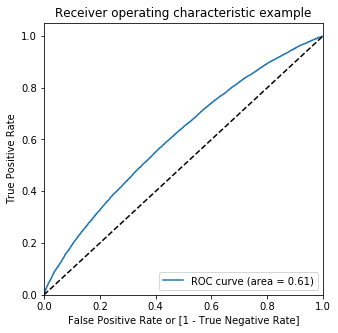

In [140]:
draw_roc(y_train_pred_final.Readmitted, y_train_pred_final.Readmitted_Prob)

### Finding Optimal Cutoff Point

Since we need more accuracy as compared to other features we'll not take any cut off

### Precision and Recall

In [141]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Readmitted, y_train_pred_final.predicted )
confusion

array([[28453,   158],
       [19061,   368]], dtype=int64)

Precision = 
TP / TP + FP

In [142]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6996197718631179

Recall =
TP / TP + FN

In [143]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.018940758659735445

### Making predictions on the test set

In [144]:
numeric = ['time_in_hospital', 'num_lab_procedures' ,'num_procedures','num_medications', 'number_diagnoses', 'total_visits']

In [145]:
X_test[numeric] = scaler.transform(X_test[numeric])

In [146]:
X_test = X_test[col]
X_test.head()

,patient_nbr,time_in_hospital,number_diagnoses,diabetesMed,total_visits,race_Caucasian,gender_Male,admission_type_id_1,admission_type_id_3,A1Cresult_0
47867,111343797.0,-0.782390,-0.714116,0.0,-0.397303,1.0,0.0,1.0,0.0,1.0
17598,307062.0,-0.105805,0.347238,0.0,-0.397303,0.0,1.0,1.0,0.0,1.0
86556,90732654.0,2.600538,0.877914,1.0,-0.397303,1.0,1.0,1.0,0.0,1.0
84112,91636794.0,-1.120683,0.877914,0.0,-0.397303,1.0,0.0,1.0,0.0,0.0
101134,86072490.0,-0.782390,-0.183439,1.0,-0.397303,0.0,0.0,0.0,1.0,1.0


In [147]:
X_test_sm = sm.add_constant(X_test)

In [148]:
y_test_pred = res.predict(X_test_sm)

In [149]:
y_test_pred[:10]

47867     0.333370
17598     0.299874
86556     0.486460
84112     0.340968
101134    0.340248
31610     0.290827
94276     0.325447
1802      0.343514
51965     0.355168
28694     0.403115
dtype: float64

In [150]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [151]:
# Let's see the head
y_pred_1.head()

,0
47867,0.333370
17598,0.299874
86556,0.486460
84112,0.340968
101134,0.340248


In [152]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [153]:
# Putting patient_nbr to index
y_test_df['patient_nbr'] = y_test_df.index

In [154]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [155]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [156]:
y_pred_final.head()

,readmitted,patient_nbr,0
0,1.0,47867,0.333370
1,0.0,17598,0.299874
2,0.0,86556,0.486460
3,0.0,84112,0.340968
4,0.0,101134,0.340248


In [157]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Readmitted_Prob'})

In [158]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['patient_nbr','readmitted','Readmitted_Prob'], axis=1)

In [159]:
# Let's see the head of y_pred_final
y_pred_final.head()

,patient_nbr,readmitted,Readmitted_Prob
0,47867,1.0,0.333370
1,17598,0.0,0.299874
2,86556,0.0,0.486460
3,84112,0.0,0.340968
4,101134,0.0,0.340248


In [160]:
y_pred_final['predicted'] = y_pred_final.Readmitted_Prob.map(lambda x: 0 if x <0.7 else 1)
y_pred_final['risk_statification'] = y_pred_final.Readmitted_Prob.map(lambda x: 'low' if x <0.3 else ('medium' if (0.3<x<0.7) else 'high') )
y_pred_final.head()

,patient_nbr,readmitted,Readmitted_Prob,predicted,risk_statification
0,47867,1.0,0.333370,0,medium
1,17598,0.0,0.299874,0,low
2,86556,0.0,0.486460,0,medium
3,84112,0.0,0.340968,0,medium
4,101134,0.0,0.340248,0,medium


In [161]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.readmitted, y_pred_final.predicted)

0.5992520277818253

In [162]:
confusion2 = metrics.confusion_matrix(y_pred_final.readmitted, y_pred_final.predicted )
confusion2

array([[12183,    85],
       [ 8166,   155]], dtype=int64)

In [163]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [164]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.018627568801826703

In [165]:
# Let us calculate specificity
TN / float(TN+FP)

0.9930714052820345

In [166]:
#accuracy
(TP+TN)/(TP+TN+FP+FN)

0.5992520277818253

In [167]:
#RECALL
TP/(TP+FN)

0.018627568801826703

#### We have an accuracy of about 60% using logistic regression

## Random Forest
<br> Working with the same train test split

In [168]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [169]:
# Putting feature variable to X
X = df.drop(['readmitted'], axis=1)
X.head()

,patient_nbr,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,change,diabetesMed,total_visits,race_AfricanAmerican,...,max_glu_serum_0,max_glu_serum_1,max_glu_serum_2,A1Cresult_0,A1Cresult_1,A1Cresult_2,comorbidity_0,comorbidity_1,comorbidity_2,comorbidity_3
1,55629189.0,3.0,59.0,0.0,18.0,9.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,86047875.0,2.0,11.0,5.0,13.0,6.0,0.0,1.0,3.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,82442376.0,2.0,44.0,1.0,16.0,7.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,42519267.0,1.0,51.0,0.0,8.0,5.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,82637451.0,3.0,31.0,6.0,16.0,9.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [170]:
# Putting response variable to y
y = df['readmitted']
y.head()

1    1.0
2    0.0
3    0.0
4    0.0
5    1.0
Name: readmitted, dtype: float64

In [171]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [172]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [173]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [174]:
# Making predictions
predictions = rfc.predict(X_test)

In [175]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [176]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.64      0.81      0.71     12268
         1.0       0.53      0.32      0.39      8321

    accuracy                           0.61     20589
   macro avg       0.58      0.56      0.55     20589
weighted avg       0.59      0.61      0.58     20589



In [177]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[9903 2365]
 [5692 2629]]


In [178]:
print(accuracy_score(y_test,predictions))

0.6086745349458449


### Hyperparameter Tuning

### Tuning max_depth

In [179]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [180]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.108735,0.007184,0.010793,0.000754,2,{'max_depth': 2},0.596316,0.595545,0.595545,0.595545,...,0.595712,0.000303,4,0.595561,0.595571,0.595571,0.595571,0.595556,0.595566,0.000007
1,0.217676,0.009276,0.013592,0.000494,7,{'max_depth': 7},0.616609,0.613759,0.621669,0.620733,...,0.621586,0.007363,3,0.627176,0.627784,0.633587,0.636163,0.629407,0.630823,0.003484
2,0.350604,0.012957,0.017788,0.000977,12,{'max_depth': 12},0.628473,0.625729,0.624896,0.622918,...,0.626769,0.003097,1,0.688793,0.690492,0.687058,0.692158,0.690604,0.689821,0.001745
3,0.458335,0.021367,0.025587,0.006278,17,{'max_depth': 17},0.626184,0.619380,0.622606,0.614280,...,0.621940,0.004731,2,0.800682,0.799932,0.805943,0.803341,0.788385,0.799657,0.006021


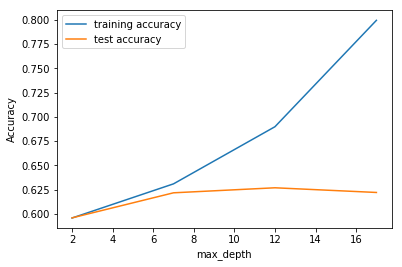

In [181]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_max_depth"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

In [182]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [183]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.187929,0.041044,0.067959,0.001550,100,{'n_estimators': 100},0.601103,0.598356,0.597627,0.599084,...,0.599688,0.001735,1,0.601884,0.601088,0.599110,0.601036,0.601202,0.600864,0.000928
1,6.078925,0.411701,0.332011,0.013296,500,{'n_estimators': 500},0.598293,0.597939,0.598876,0.599188,...,0.598585,0.000436,3,0.598085,0.599422,0.600177,0.601088,0.597689,0.599292,0.001269
2,10.841636,0.268276,0.576870,0.017528,900,{'n_estimators': 900},0.598397,0.598251,0.599188,0.599188,...,0.598689,0.000412,2,0.599126,0.599084,0.601764,0.600879,0.597898,0.599750,0.001385
3,15.001522,0.360645,0.807542,0.004431,1300,{'n_estimators': 1300},0.598814,0.598147,0.599500,0.599084,...,0.598543,0.000816,4,0.599204,0.599943,0.601400,0.600489,0.597533,0.599714,0.001305


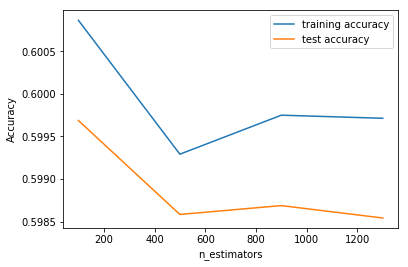

In [184]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning max_features

In [185]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [186]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.103541,0.005384,0.011194,0.000400,4,{'max_features': 4},0.595692,0.595649,0.596066,0.595649,...,0.595733,0.000169,5,0.595613,0.596248,0.598173,0.595623,0.595556,0.596243,0.000998
1,0.138317,0.002659,0.011193,0.000399,8,{'max_features': 8},0.596836,0.598876,0.601270,0.601998,...,0.599188,0.002136,4,0.597252,0.600463,0.602493,0.604835,0.597325,0.600474,0.002946
2,0.193290,0.014058,0.011394,0.000490,14,{'max_features': 14},0.612655,0.616049,0.615425,0.615216,...,0.615216,0.001387,3,0.618979,0.617090,0.617480,0.614540,0.613327,0.616283,0.002056
3,0.240057,0.009899,0.011592,0.000800,20,{'max_features': 20},0.621188,0.625000,0.620108,0.604913,...,0.619088,0.007319,2,0.626551,0.625755,0.625364,0.609492,0.616267,0.620686,0.006735
4,0.282232,0.008116,0.011595,0.000491,24,{'max_features': 24},0.621397,0.625104,0.619588,0.620108,...,0.623959,0.005192,1,0.626317,0.627160,0.627836,0.627186,0.625270,0.626754,0.000885


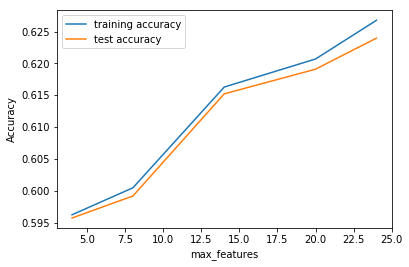

In [187]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [188]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [189]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.297833,0.010198,0.015992,0.000635,100,{'min_samples_leaf': 100},0.623374,0.624271,0.623335,0.620212,...,0.624688,0.004022,1,0.633291,0.632182,0.636553,0.637307,0.631228,0.634112,0.002404
1,0.271648,0.010787,0.015193,0.000752,150,{'min_samples_leaf': 150},0.623998,0.620837,0.618651,0.617090,...,0.620525,0.002441,3,0.630429,0.630464,0.626873,0.628591,0.620508,0.627373,0.003681
2,0.259052,0.013332,0.015589,0.002730,200,{'min_samples_leaf': 200},0.619940,0.620108,0.616674,0.618131,...,0.621607,0.005924,2,0.624756,0.626067,0.626431,0.627212,0.625218,0.625937,0.000871
3,0.244857,0.024774,0.013790,0.000398,250,{'min_samples_leaf': 250},0.615361,0.615008,0.618131,0.611782,...,0.617402,0.005080,4,0.619786,0.621305,0.624974,0.622138,0.621783,0.621997,0.001691
4,0.225459,0.007653,0.013995,0.000637,300,{'min_samples_leaf': 300},0.617546,0.621878,0.614904,0.614072,...,0.617298,0.002750,5,0.617678,0.625286,0.618859,0.619770,0.613900,0.619099,0.003684


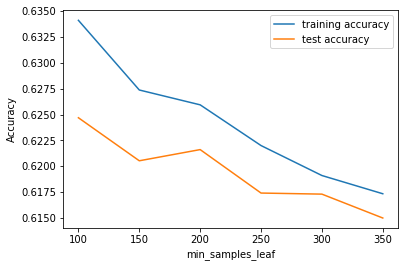

In [190]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [191]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [192]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.382175,0.013923,0.019991,0.003030,200,{'min_samples_split': 200},0.633156,0.630100,0.631037,0.629788,...,0.633784,0.005653,1,0.663189,0.666476,0.666788,0.664004,0.664377,0.664967,0.001416
1,0.396766,0.037614,0.019391,0.002868,250,{'min_samples_split': 250},0.628161,0.630308,0.632702,0.626665,...,0.630620,0.003089,4,0.658869,0.660725,0.664004,0.658019,0.658653,0.660054,0.002171
2,0.343204,0.002872,0.018788,0.001833,300,{'min_samples_split': 300},0.630347,0.633118,0.629371,0.628955,...,0.632244,0.003875,2,0.656970,0.655573,0.658956,0.656900,0.652330,0.656146,0.002192
3,0.397174,0.034938,0.025586,0.004589,350,{'min_samples_split': 350},0.627329,0.632390,0.624063,0.627394,...,0.630058,0.005253,5,0.652286,0.653284,0.652373,0.649225,0.649572,0.651348,0.001633
4,0.334009,0.017484,0.016787,0.000401,400,{'min_samples_split': 400},0.631283,0.631245,0.626353,0.627602,...,0.630953,0.004155,3,0.648799,0.646649,0.648236,0.648990,0.645513,0.647637,0.001344


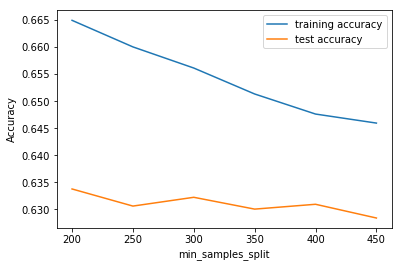

In [193]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [194]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3,6,7],
    'min_samples_leaf': range(100, 350, 50),
    'min_samples_split': range(200, 350, 50),
    'n_estimators': [100,200, 300], 
    'max_features': [8, 22, 15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [195]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed: 28.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [196]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.6276436303080766 using {'max_depth': 7, 'max_features': 22, 'min_samples_leaf': 100, 'min_samples_split': 300, 'n_estimators': 100}


### Fitting the final model with the best parameters obtained from grid search.

In [218]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=100, 
                             min_samples_split=300,
                             max_features=22,
                             n_estimators=100)

In [219]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=22, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [220]:
# predict
y_test_pred = rfc.predict(X_test)

In [200]:
y_test_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [221]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [222]:
# Let's see the head
y_pred_1.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [223]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [224]:
# Putting patient_nbr to index
y_test_df['patient_nbr'] = y_test_df.index

In [225]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [226]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [227]:
y_pred_final.head()

,readmitted,patient_nbr,0
0,1.0,47867,0.0
1,0.0,17598,0.0
2,0.0,86556,0.0
3,0.0,84112,0.0
4,0.0,101134,0.0


In [228]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Readmitted_Prob'})

In [229]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['patient_nbr','readmitted','Readmitted_Prob'], axis=1)

In [230]:
# Let's see the head of y_pred_final
y_pred_final.head()

,patient_nbr,readmitted,Readmitted_Prob
0,47867,1.0,0.0
1,17598,0.0,0.0
2,86556,0.0,0.0
3,84112,0.0,0.0
4,101134,0.0,0.0


In [231]:
y_pred_final['predicted'] = y_pred_final.Readmitted_Prob.map(lambda x: 0 if x <0.7 else 1)
y_pred_final['risk_statification'] = y_pred_final.Readmitted_Prob.map(lambda x: 'low' if x <0.3 else ('medium' if (0.3<x<0.7) else 'high') )
y_pred_final.head()

,patient_nbr,readmitted,Readmitted_Prob,predicted,risk_statification
0,47867,1.0,0.0,0,low
1,17598,0.0,0.0,0,low
2,86556,0.0,0.0,0,low
3,84112,0.0,0.0,0,low
4,101134,0.0,0.0,0,low


In [232]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.readmitted, y_pred_final.predicted)

0.6276166885229977

In [233]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [234]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.64      0.81      0.71     12268
         1.0       0.53      0.32      0.39      8321

    accuracy                           0.61     20589
   macro avg       0.58      0.56      0.55     20589
weighted avg       0.59      0.61      0.58     20589



In [235]:
print(confusion_matrix(y_test,predictions))

[[9903 2365]
 [5692 2629]]


#### We have an accuracy of about 63% using random forest

## List of patients with their risk stratifications

In [239]:
prediction = y_pred_final[['patient_nbr','risk_statification']]
prediction

,patient_nbr,risk_statification
0,47867,low
1,17598,low
2,86556,low
3,84112,low
4,101134,low
5,31610,low
6,94276,low
7,1802,low
8,51965,low
9,28694,high


The final risk stratification to identify high-risk diabetic patients.

In [236]:
# Converting it into a .csv file
prediction.to_csv("prediction.csv")